In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

%matplotlib inline
%run "Fonctions.ipynb"

In [2]:
normandie = pd.read_csv('../Normandie/normandie.csv', low_memory=False)

In [3]:
millau = pd.read_csv('../Millau/Resultats/Fichiers Excel/new_millau.csv', low_memory=False)

In [5]:
normandie = normandie[~normandie['axle groups'].apply(lambda x: '.' in x)]
normandie_df = pd.DataFrame()
normandie_df = pd.concat([normandie_df, timestamp_dummies(normandie['timestamp'])], axis=1)
normandie_df = pd.concat([normandie_df, warningFlags_dummies(normandie['warning flags'])], axis=1)
normandie_df[['lane', 'N', 'subclass id']] = normandie[['lane', 'N', 'subclass id']]
normandie_df['v'] = ms_kmh(normandie['v'])
normandie_df = pd.concat([normandie_df, axleGroups_dummies(normandie['axle groups'])], axis=1)
normandie_df['gross weight'] = kN_t(normandie['gross weight'])
normandie_df[['_long', 'T', 'X2R', 'sum_strip_1', 'sum_strip_2']] = normandie[['_long', 'T', 'X2R', 'sum_strip_1', 'sum_strip_2']]
normandie_df[list_multiple_var('load_', 1, 16)] = kN_t(normandie[list_multiple_var('load_', 1, 16)])
normandie_df[list_multiple_var('d_', 1, 15)] = kN_t(normandie[list_multiple_var('d_', 1, 15)])

### Clustering

In [40]:
normandie_df.fillna(0, inplace=True)

In [42]:
X_train, X_test = train_test_split(normandie_df, test_size=0.3, random_state=42)

In [67]:
predicted = KMeans(init='random', n_clusters=2, random_state=42).fit_predict(normandie_df)

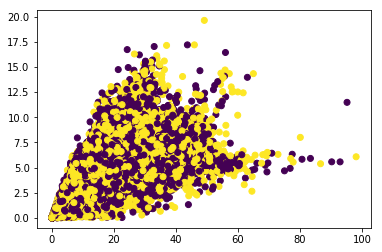

In [68]:
plt.scatter(normandie_df['gross weight'], normandie_df['load_1'], c=predicted)
plt.show()

In [12]:
path = 'E:\\Projet stage\\Millau\\Resultats\\NSWD'
dest_nswd = path + '\\All.nswd'
extension = '.nswd'

nswd = find_all_extension(path, extension)
with open(dest_nswd, 'w') as file_dest:
    for elt in nswd:
        with open(elt, 'r') as file_src:
            result = file_src.read()
            file_dest.write(result)

In [22]:
load_list_mil = list_multiple_var("load_", 1, 7)
len(millau[load_list_mil][millau['load_1'] == 0])

2943

In [150]:
np.var(normandie['load_9']) # Variance

187.59891720937

In [168]:
neg_w2 = len(warningFlags[warningFlags['W2'] == 8 ])
print("Negative axle loads : " + str(neg_w2))

mult_w0 = len(warningFlags[warningFlags['W0'] == 1 ])
print("Multiple truck presence : " + str(mult_w0))

icomp_w6 = len(warningFlags[warningFlags['W6'] == 1 ])
print("Incomplete MP signals : " + str(icomp_w6))

for j in range(2):
    for i in range(1,17):
        if j and i == 16:
            break
        str_d = 'd_' if j else 'load_'
        str_sen = 'Dist. essieux ' if j else 'Charge essieu '
        sup = 7 if j else round(20/0.102)
        unit = 'm' if j else 'kN'
        str_d += str(i)
        print(str_sen + "\t" + str_d + "\t neg : " + str(len(normandie[normandie[str_d] < 0])) + " \tnull : " + str(len(normandie[normandie[str_d] == 0]))  + " \tsup(>"+str(sup)+ unit +") : " + str(len(normandie[normandie[str_d] > sup])))

    
print("Poids brut total neg : " + str(len(normandie[normandie['gross weight'] < 0])) + ", null : " + str(len(normandie[normandie['gross weight'] == 0])) + " et sup(>70t) : " + str(len(normandie[normandie['gross weight'] > (70/0.102)])))
print("Longueur neg : " + str(len(normandie[normandie['_long'] < 0])) + ", null : " + str(len(normandie[normandie['_long'] == 0])) + " et hors(2< x <25m) : " + str(len(normandie[normandie['_long'] > 25]) + len(normandie[normandie['_long'] < 2])))
print("Nbr essieux sup(>6) : " + str(len(normandie[normandie['N'] > 6])))

Negative axle loads : 1854
Multiple truck presence : 18206
Incomplete MP signals : 6775
Charge essieu 	load_1	 neg : 0 	null : 2934 	sup(>196kN) : 0
Charge essieu 	load_2	 neg : 0 	null : 2934 	sup(>196kN) : 0
Charge essieu 	load_3	 neg : 0 	null : 2317 	sup(>196kN) : 0
Charge essieu 	load_4	 neg : 0 	null : 1755 	sup(>196kN) : 0
Charge essieu 	load_5	 neg : 0 	null : 1248 	sup(>196kN) : 0
Charge essieu 	load_6	 neg : 0 	null : 912 	sup(>196kN) : 0
Charge essieu 	load_7	 neg : 0 	null : 635 	sup(>196kN) : 0
Charge essieu 	load_8	 neg : 0 	null : 487 	sup(>196kN) : 0
Charge essieu 	load_9	 neg : 0 	null : 384 	sup(>196kN) : 0
Charge essieu 	load_10	 neg : 0 	null : 311 	sup(>196kN) : 0
Charge essieu 	load_11	 neg : 0 	null : 251 	sup(>196kN) : 0
Charge essieu 	load_12	 neg : 0 	null : 200 	sup(>196kN) : 0
Charge essieu 	load_13	 neg : 0 	null : 145 	sup(>196kN) : 0
Charge essieu 	load_14	 neg : 0 	null : 112 	sup(>196kN) : 0
Charge essieu 	load_15	 neg : 0 	null : 74 	sup(>196kN) : 0
Ch

In [169]:
df = pd.concat([normandie, warningFlags], axis=1)

In [170]:
df_noNegAxle = df.drop(df[df['W1'] == 8].index)

In [171]:
neg_w2 = len(df[df['W1'] == 8 ])
print("Negative axle loads : " + str(neg_w2))

mult_w0 = len(df[df['W0'] == 1 ])
print("Multiple truck presence : " + str(mult_w0))

icomp_w6 = len(df[df['W6'] == 1 ])
print("Incomplete MP signals : " + str(icomp_w6))

for j in range(2):
    for i in range(1,17):
        if j and i == 16:
            break
        str_d = 'd_' if j else 'load_'
        str_sen = 'Dist. essieux ' if j else 'Charge essieu '
        sup = 7 if j else (20/0.102)
        unit = 'm' if j else 'kN'
        str_d += str(i)
        print(str_sen + "\t" + str_d + "\t neg : " + str(len(df[df[str_d] < 0])) + " \tnull : " + str(len(df[df[str_d] == 0]))  + " \tsup(>"+str(sup)+ unit +") : " + str(len(df[df[str_d] > sup])))
    
print("Poids brut total neg : " + str(len(df[df['gross weight'] < 0])) + ", null : " + str(len(df[df['gross weight'] == 0])) + " et sup(>70t) : " + str(len(df[df['gross weight'] > (70/0.102)])))
print("Longueur neg : " + str(len(df[df['_long'] < 0])) + ", null : " + str(len(df[df['_long'] == 0])) + " et hors(2< x <25m) : " + str(len(df[df['_long'] > 25]) + len(df[df['_long'] < 2])))
print("Nbr essieux sup(>6) : " + str(len(df[df['N'] > 6])))

Negative axle loads : 2934
Multiple truck presence : 18206
Incomplete MP signals : 6775
Charge essieu 	load_1	 neg : 0 	null : 2934 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_2	 neg : 0 	null : 2934 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_3	 neg : 0 	null : 2317 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_4	 neg : 0 	null : 1755 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_5	 neg : 0 	null : 1248 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_6	 neg : 0 	null : 912 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_7	 neg : 0 	null : 635 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_8	 neg : 0 	null : 487 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_9	 neg : 0 	null : 384 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_10	 neg : 0 	null : 311 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_11	 neg : 0 	null : 251 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_12	 neg : 0 	null : 200 	sup(>196.07843137254903kN) : 0
Char

In [173]:
df_sous25 = df_noNegAxle[df_noNegAxle['_long'] < 25]

In [18]:
plt.scatter(df_sous25['gross weight']*0.102, df_sous25['_long'])
plt.title("Poid lourds sans axe négatif")
plt.xlabel('gross weight (t)')
plt.ylabel('long (m)')
plt.show()

NameError: name 'df_sous25' is not defined

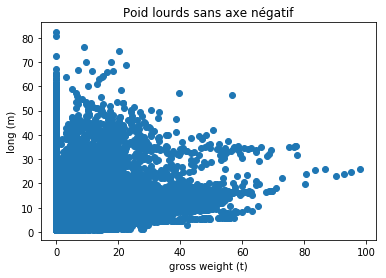

In [17]:
plt.scatter(normandie['gross weight']*0.102, normandie['_long'])
plt.title("Poid lourds sans axe négatif")
plt.xlabel('gross weight (t)')
plt.ylabel('long (m)')
plt.show()

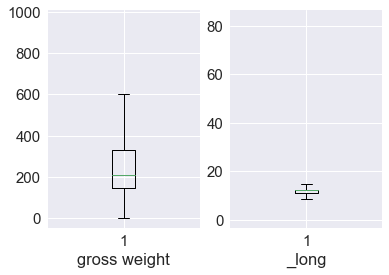

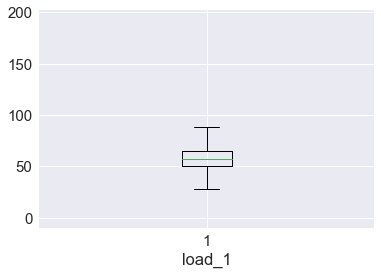

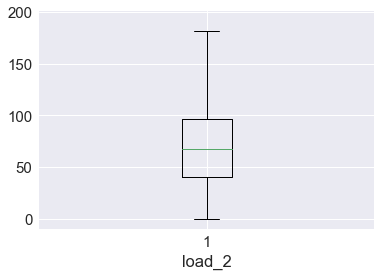

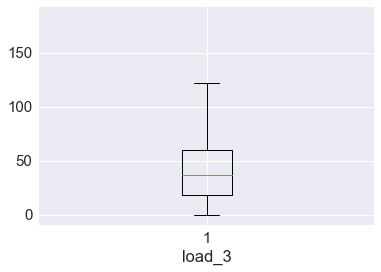

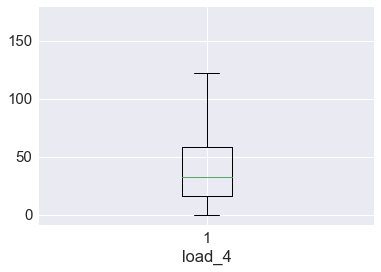

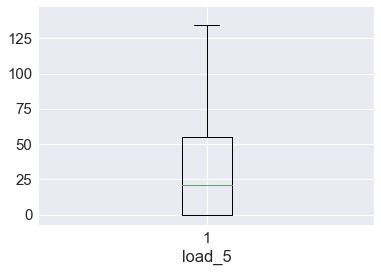

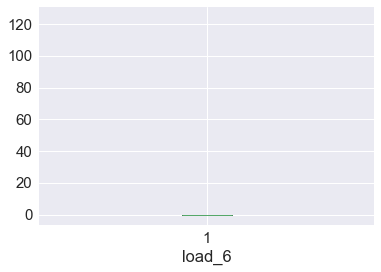

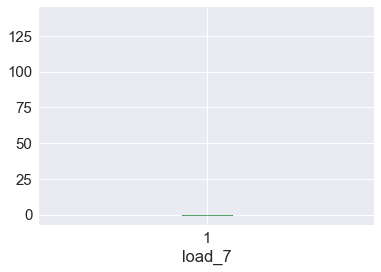

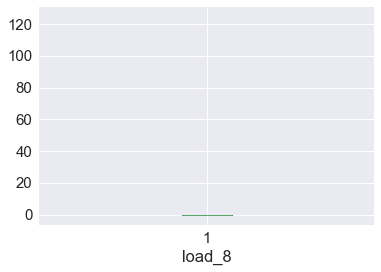

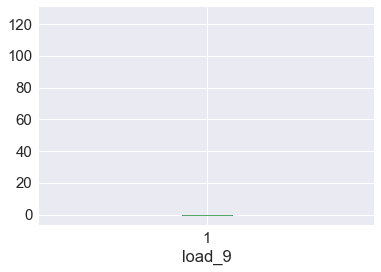

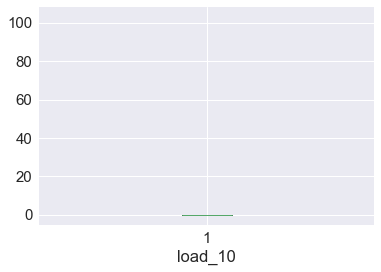

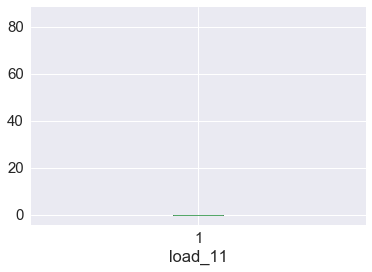

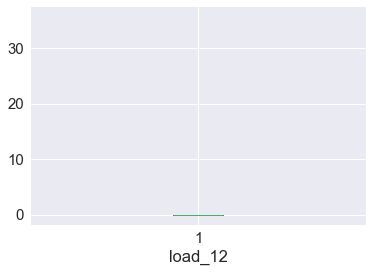

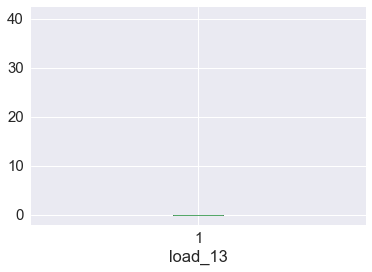

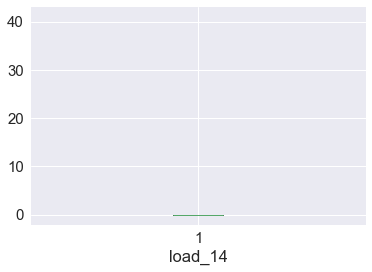

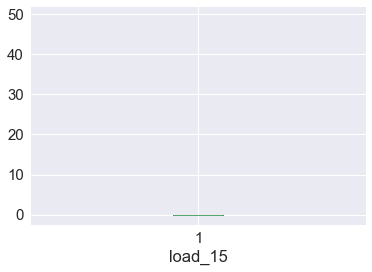

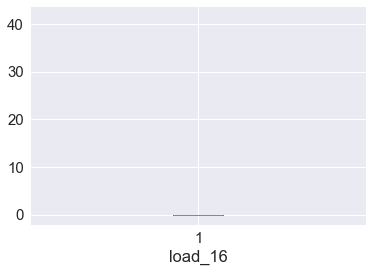

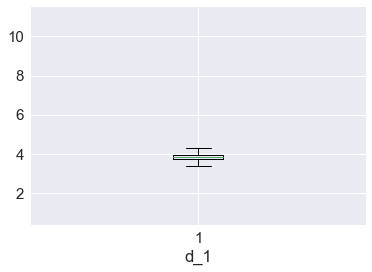

C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


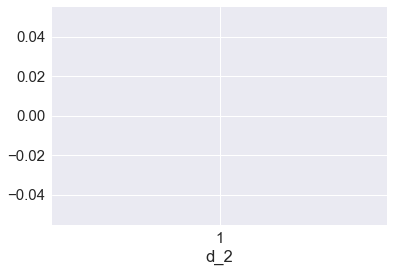

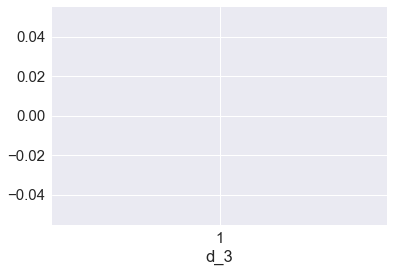

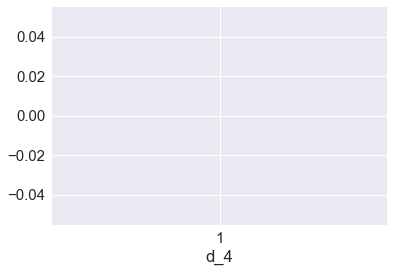

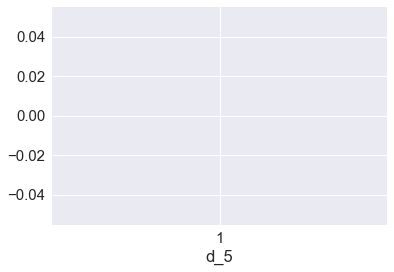

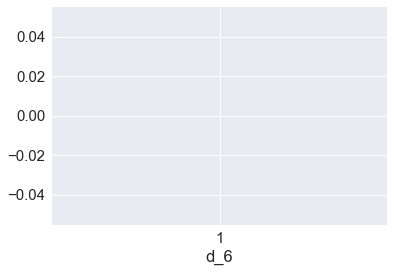

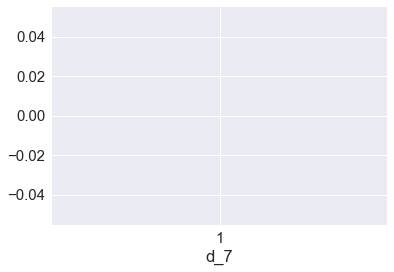

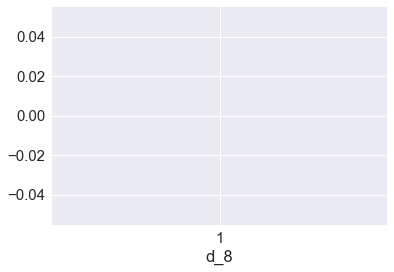

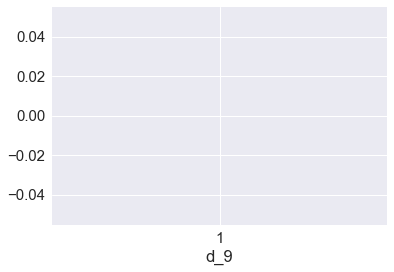

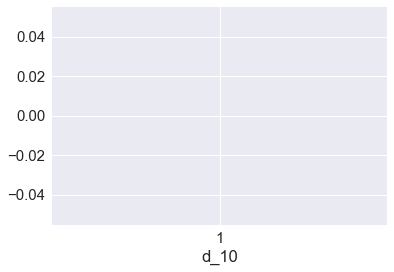

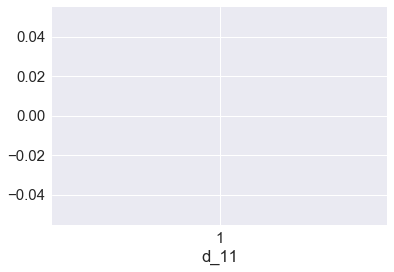

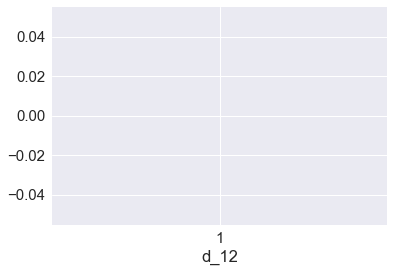

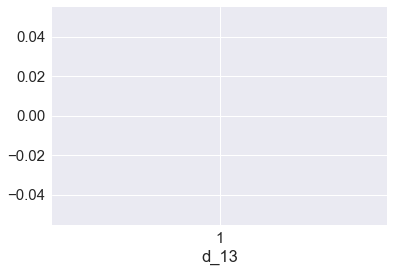

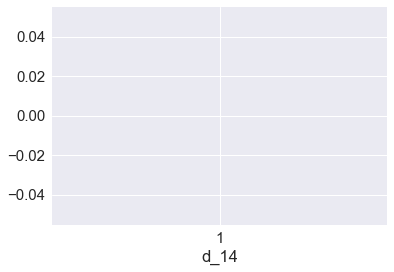

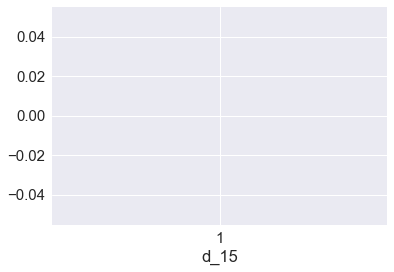

In [175]:
plt.subplot(121)
plt.boxplot(df['gross weight'])
plt.xlabel('gross weight')

plt.subplot(122)
plt.boxplot(df['_long'])
plt.xlabel('_long')

plt.show()

load_list = ['load_{}'.format(i+1) for i in range(16)]
for col in load_list:
    plt.boxplot(df[col].fillna(0))
    plt.xlabel(str(col))
    plt.show()

for col in ['d_{}'.format(i+1) for i in range(15)]:
    plt.boxplot(df[col])
    plt.xlabel(str(col))
    plt.show()

In [113]:
normandie.describe()

,lane,v,N,subclass id,gross weight,load_1,load_2,load_3,load_4,load_5,...,d_12,d_13,d_14,d_15,T,impact factor,X2R,M,sum_strip_1,sum_strip_2
count,237584.000000,237584.000000,237584.000000,237584.00000,237584.000000,237584.000000,237584.000000,207372.000000,196550.000000,153292.000000,...,421.000000,315.000000,196.000000,92.000000,237584.000000,237584.0,237584.000000,237584.0,237584.000000,237584.000000
mean,1.089190,19.277538,4.425370,88.06335,228.549278,55.460621,68.759756,43.858591,43.366281,44.519264,...,2.845014,2.683874,2.864155,2.329976,14.740018,1.0,78.542746,2.0,0.626714,0.148957
std,0.285018,3.197534,1.227588,30.35567,111.396796,16.531074,34.321736,22.081528,22.006294,22.683761,...,2.197295,2.110099,2.076503,1.735063,9.820728,0.0,134.712830,0.0,0.492046,0.260486
min,1.000000,10.014700,2.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.945813,0.900000,0.920000,0.943089,-273.000000,1.0,0.208766,2.0,-1.964440,-4.226390
25%,1.000000,16.650400,4.000000,61.00000,144.661000,50.345350,40.285725,23.969775,23.267950,22.170950,...,1.435900,1.410130,1.429760,1.311102,8.316245,1.0,24.201100,2.0,0.255615,0.036468
50%,1.000000,19.051200,5.000000,103.00000,208.315000,57.060000,67.577950,41.910550,40.704550,44.134750,...,1.924530,1.814430,1.892270,1.616150,12.868300,1.0,47.206850,2.0,0.469578,0.089774
75%,1.000000,21.903700,5.000000,113.00000,327.922750,65.363000,96.773825,62.826500,62.732950,64.953475,...,3.461990,2.946665,3.764128,2.917112,19.500000,1.0,83.499450,2.0,0.984891,0.195901
max,2.000000,44.521700,16.000000,140.00000,961.794000,192.458000,191.138000,183.017000,170.538000,140.084000,...,10.994700,10.829300,9.789470,10.061300,47.568400,1.0,9116.000000,2.0,6.196510,4.639600


In [176]:
normandie.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\brouail\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [59]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

In [64]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==